# Maps of mortality rates.

In [131]:
from util import centimeter_to_inch
import pandas as pd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import pathlib
from PIL import Image

## Loading data

In [132]:
df = pd.read_csv('data/output/df_mortality.csv', index_col=0)

In [133]:
df

code_municipality_6  code_municipality_7  population        date  \
0                  110001              1100015       21495  2022-12-31   
1                  110002              1100023       96833  2022-12-31   
2                  110003              1100031        5363  2022-12-31   
3                  110004              1100049       86895  2022-12-31   
4                  110005              1100056       15890  2022-12-31   
...                   ...                  ...         ...         ...   
5565               522200              5222005       14956  2022-12-31   
5566               522205              5222054        8768  2022-12-31   
5567               522220              5222203        4215  2022-12-31   
5568               522230              5222302        5815  2022-12-31   
5569               530010              5300108     2817068  2022-12-31   

      deaths  new_deaths  deaths_accumulated_first_semester_2020  \
0       93.0         0.0                                     0.0   
1      540.0         0.0                                    20.0   
2       15.0         0.0                                     1.0   
3      351.0         0.0                                     6.0   
4       76.0         0.0                                     2.0   
...      ...         ...                                     ...   
5565    47.0         0.0                                     0.0   
5566    34.0         0.0                                     1.0   
5567     7.0         0.0                                     0.0   
5568    11.0         0.0                                     1.0   
5569  9685.0         1.0                                   564.0   

      delta_first_death_2020-06-30  deaths_accumulated_2020  \
0                              0.0                     16.0   
1                             44.0                    122.0   
2                              0.0                      4.0   
3                             85.0                     60.0   
4                             41.0                      8.0   
...                            ...                      ...   
5565                           0.0                      7.0   
5566                          20.0                      8.0   
5567                           0.0                      2.0   
5568                           2.0                      3.0   
5569                          99.0                   3098.0   

      delta_first_death_2020-12-31  ...  Death rate (May-June, 2021)  \
0                            183.0  ...                    55.826936   
1                            228.0  ...                    77.452934   
2                            184.0  ...                    74.585120   
3                            269.0  ...                    84.009437   
4                            225.0  ...                    69.225928   
...                            ...  ...                          ...   
5565                         174.0  ...                    66.862798   
5566                         204.0  ...                    34.215328   
5567                         174.0  ...                     0.000000   
5568                         186.0  ...                    17.196905   
5569                         283.0  ...                    41.923021   

      Death rate (July-August, 2021)  Death rate (September-October, 2021)  \
0                           9.304489                              9.304489   
1                          22.719527                              7.228941   
2                          18.646280                             18.646280   
3                          20.714656                             10.357328   
4                          12.586532                             18.879799   
...                              ...                                   ...   
5565                       20.058839                             13.372560   
5566                        0.000000                  

In [134]:
try:
    filename_map_municipalities = 'data/output/map_municipalities_2010.geojson'
    path_map_municipalities = pathlib.Path(filename_map_municipalities)
    map_municipalities = gpd.read_file(path_map_municipalities)

    filename_map_states = 'data/output/map_states_2010.geojson'
    path_map_states = pathlib.Path(filename_map_states)
    map_states = gpd.read_file(path_map_states)
except:
    map_municipalities = geobr.read_municipality(year=2010)
    map_states =  geobr.read_state(year=2010)
    map_municipalities.to_file('data/output/map_municipalities_2010.geojson', driver='GeoJSON')
    map_states.to_file('data/output/map_states_2010.geojson', driver='GeoJSON')

In [135]:
df_map_municipalities = map_municipalities.merge(df, how="left", left_on="code_muni", right_on="code_municipality_7")

In [136]:
df_map_municipalities = df_map_municipalities.loc[df_map_municipalities['name_muni'].isin(['Lagoa Mirim', 'Lagoa Dos Patos']) == False]

In [137]:
df_map_municipalities[df_map_municipalities['population'].isna()]

code_muni       name_muni  code_state abbrev_state  \
223   1504703.0            Moju        15.0           PA   
4418  4207007.0           Içara        42.0           SC   
4421  4207304.0        Imbituba        42.0           SC   
4695  4304804.0  Carlos Barbosa        43.0           RS   
5152  5005681.0      Mundo Novo        50.0           MS   

                                               geometry  code_municipality_6  \
223   POLYGON ((-48.55770 -1.71801, -48.53041 -1.699...                  NaN   
4418  POLYGON ((-49.23878 -28.67659, -49.22586 -28.6...                  NaN   
4421  MULTIPOLYGON (((-48.64276 -28.15454, -48.64479...                  NaN   
4695  MULTIPOLYGON (((-51.49027 -29.27708, -51.49019...                  NaN   
5152  MULTIPOLYGON (((-54.36228 -23.90302, -54.36947...                  NaN   

      code_municipality_7  population date  deaths  ...  \
223                   NaN         NaN  NaN     NaN  ...   
4418                  NaN         NaN  NaN     NaN  ...   
4421                  NaN         NaN  NaN     NaN  ...   
4695                  NaN         NaN  NaN     NaN  ...   
5152                  NaN         NaN  NaN     NaN  ...   

      Death rate (May-June, 2021)  Death rate (July-August, 2021)  \
223                           NaN                             NaN   
4418                          NaN                             NaN   
4421                          NaN                             NaN   
4695                          NaN                             NaN   
5152                          NaN                             NaN   

      Death rate (September-October, 2021)  \
223                                    NaN   
4418                                   NaN   
4421                                   NaN   
4695                                   NaN   
5152                                   NaN   

      Death rate (November-December, 2021)  \
223                                    NaN   
4418                                   NaN   
4421                                   NaN   
4695                                   NaN   
5152                                   NaN   

      Death rate (January-February, 2022)  Death rate (March-April, 2022)  \
223                                   NaN                             NaN   
4418                                  NaN                             NaN   
4421                                  NaN                             NaN   
4695                                  NaN                             NaN   
5152                                  NaN                             NaN   

      Death rate (May-June, 2022)  Death rate (July-August, 2022)  \
223                           NaN                             NaN   
4418                          NaN                             NaN   
4421                          NaN                             NaN   
4695                          NaN                             NaN   
5152                          NaN                             NaN   

      Death rate (September-October, 2022)  \
223                                    NaN   
4418                                   NaN   
4421                                   NaN   
4695                                   NaN   
5152                                   NaN   

      Death rate (November-December, 2022)  
223                                    NaN  
4418                                   NaN  
4421                                   NaN  
4695                                   NaN  
5152                                   NaN  

[5 rows x 80 columns]

## Map visualizations

In [138]:
custom_points = {}

point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
point = Point(point.x, point.y - 2.2)
custom_points['RJ'] = point

point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
point = Point(point.x + 0.6, point.y - 0.8)
custom_points['SC'] = point

point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
point = Point(point.x + 2.1, point.y - 1)
custom_points['ES'] = point

point = map_states[map_states.abbrev_state == 'SE'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1.5)
custom_points['SE'] = point

point = map_states[map_states.abbrev_state == 'AL'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1)
custom_points['AL'] = point

point = map_states[map_states.abbrev_state == 'PE'].geometry.centroid.values[0]
point = Point(point.x + 4.1, point.y - 0.7)
custom_points['PE'] = point

point = map_states[map_states.abbrev_state == 'PB'].geometry.centroid.values[0]
point = Point(point.x + 3.1, point.y - 0.5)
custom_points['PB'] = point

point = map_states[map_states.abbrev_state == 'RN'].geometry.centroid.values[0]
point = Point(point.x + 2.8, point.y)
custom_points['RN'] = point

point = map_states[map_states.abbrev_state == 'PI'].geometry.centroid.values[0]
point = Point(point.x + 1, point.y)
custom_points['PI'] = point

point = map_states[map_states.abbrev_state == 'DF'].geometry.centroid.values[0]
point = Point(point.x, point.y + 0.35)
custom_points['DF'] = point

point = map_states[map_states.abbrev_state == 'GO'].geometry.centroid.values[0]
point = Point(point.x, point.y - 1.4)
custom_points['GO'] = point

point = map_states[map_states.abbrev_state == 'AC'].geometry.centroid.values[0]
point = Point(point.x, point.y - 0.4)
custom_points['AC'] = point

<ipython-input-138-14fc443e71bc>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
<ipython-input-138-14fc443e71bc>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
<ipython-input-138-14fc443e71bc>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
<ipython-input-138-14fc443e71bc>:15: UserWarning: Geometry is in a geographic CRS. Results

In [139]:
df_map_municipalities.columns

Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'geometry',
       'code_municipality_6', 'code_municipality_7', 'population', 'date',
       'deaths', 'new_deaths', 'deaths_accumulated_first_semester_2020',
       'delta_first_death_2020-06-30', 'deaths_accumulated_2020',
       'delta_first_death_2020-12-31', 'deaths_accumulated_2021',
       'delta_first_death_2021-12-31', 'delta_first_death_2022-12-31',
       'delta_first_death_general_period',
       'death_rate_accumulated_first_semester_2020',
       'death_rate_accumulated_2020', 'death_rate_accumulated_2021',
       'Death rate (accumulated period)', 'Death rate (2022)',
       'Death rate (2021)', 'Death rate (2020)', 'Death rate (1/2020)',
       'deaths_2022', 'deaths_2021', 'death_accumulated_2020_04',
       'death_accumulated_2020_04_rate', 'death_accumulated_2020_06',
       'death_accumulated_2020_06_rate', 'death_accumulated_2020_08',
       'death_accumulated_2020_08_rate', 'death_accumulated_2020_10'

In [140]:
def plot_map_mortality(df, width=34.8, height=52.2, nrows=3, ncols=2, filename_extra='',
                       columns = ['Death rate (1/2020)', 'Death rate (2020)', 'Death rate (2021)', 'Death rate (2022)', 'Death rate (accumulated period)'],
                       titles = ['a) 2020 (first half)', 'b) 2020', 'c) 2021', 'd) 2022', 'e) Accumulated period'],
                       ignore_outliers = [False, False, False, False, False, False]):
    df = df.copy()

    linewidth_estados = 0.4
    # linewidth_municipios = linewidth_estados * 0.000001
    linewidth_municipios = 0

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(centimeter_to_inch(width), centimeter_to_inch(height)), nrows=nrows, ncols=ncols, subplot_kw=dict(aspect='equal'))
    ax = ax.ravel()
    
    for j  in range(len(columns)):
        column = columns[j]
        ax_atual = ax[j]
        
        outlier_threshold = df[column].quantile(0.75) + ((df[column].quantile(0.75) - df[column].quantile(0.25)) * 1.5)
        
        df_outliers = df.loc[((df[column] > outlier_threshold) & (ignore_outliers[j]==False)) | (df[column].isna())].copy()
        df_normal = df.loc[(df[column] <= outlier_threshold) | (ignore_outliers[j]==True) | (df[column].isna()) ]
        
        ax_atual.title.set_text(titles[j])

        missing_kwds = dict(color='grey', label='No data')

        normal_plot = df_normal.plot(
            column=column,
            cmap='OrRd',
            legend=True,            
            legend_kwds={"label": "Death rate","orientation": "horizontal","pad": -0.025},
            edgecolor="gray",            
            linewidth=linewidth_municipios,
            categorical=False,    
            missing_kwds=missing_kwds,
            ax=ax_atual
        )
                
        if ignore_outliers[j] == False:
            df_outliers.loc[df_outliers[column] > 0, 'outlier'] = 'Outlier'
            outlier_plot = df_outliers.plot(
                column='outlier',
                cmap='tab20b',            
                legend=j==0,            
                edgecolor="gray",
                linewidth=linewidth_municipios,
                categorical=True,
                missing_kwds=missing_kwds,
                legend_kwds={'bbox_to_anchor': (1.1,1.0)},
                ax=ax_atual
            )     
            if j == 0:
                labels = outlier_plot.get_legend().texts
                handles = outlier_plot.get_legend().legend_handles
                fig.legend(handles=handles, labels=[label.get_text() for label in labels],loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.025))
                outlier_plot.legend([], frameon=False) 

        map_states.boundary.plot(edgecolor="black", linewidth=linewidth_estados, ax=ax_atual)

        map_states[map_states.abbrev_state.isin(['RJ', 'SC', 'ES', 'SE', 'AL', 'PE', 'PB', 'RN', 'DF', 'GO', 'PI', 'AC']) == False].apply(lambda x: ax_atual.annotate(text=x.abbrev_state, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

        for point in custom_points.keys():
            ax_atual.text(custom_points[point].x, custom_points[point].y, point, ha='center')

        ax_atual.axis("off")
                    
    if (len(columns)%2 != 0) & (nrows > 1):
        ax[len(columns)].remove()

    fig.tight_layout()

    fig.savefig('images/map_moratality_years'+filename_extra+'.png', bbox_inches="tight")    
    # fig.savefig('images/map_moratality_years'+filename_extra+'.pdf', bbox_inches="tight")

    plt.savefig('images/map_moratality_years'+filename_extra+'.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
    img = Image.open('images/map_moratality_years'+filename_extra+'.tiff')
    img.save('images/map_moratality_years'+filename_extra+'_compressed.tiff', compression="tiff_lzw")    
    plt.show()

<ipython-input-140-58ec36b1dcec>:58: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  outlier_plot.legend([], frameon=False)


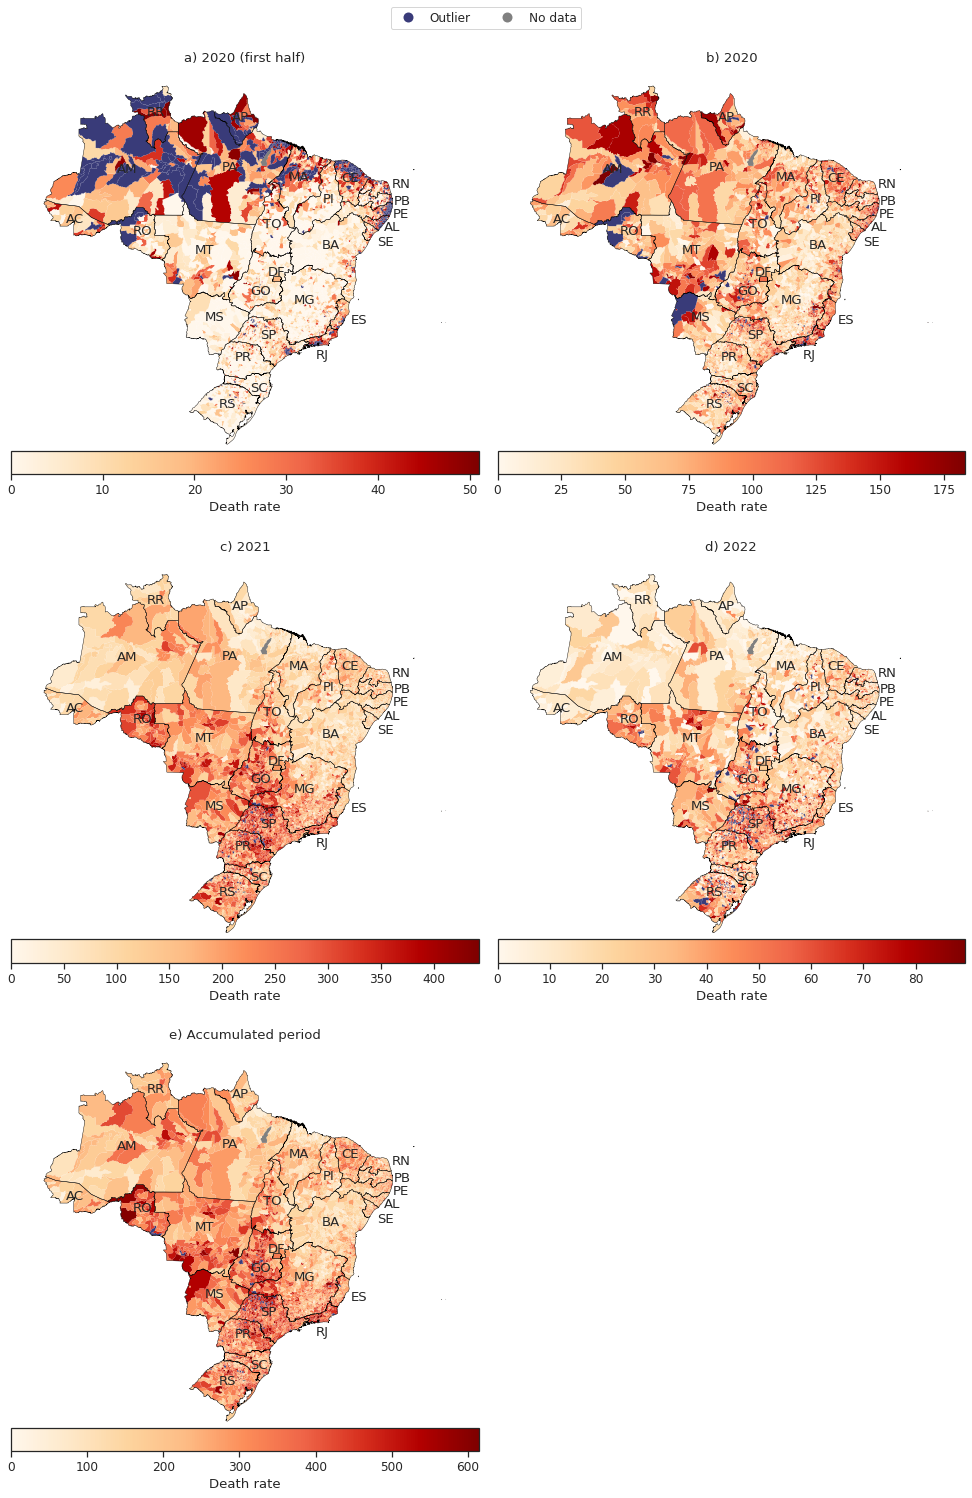

In [141]:
handles = plot_map_mortality(df_map_municipalities)

<ipython-input-140-58ec36b1dcec>:58: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  outlier_plot.legend([], frameon=False)


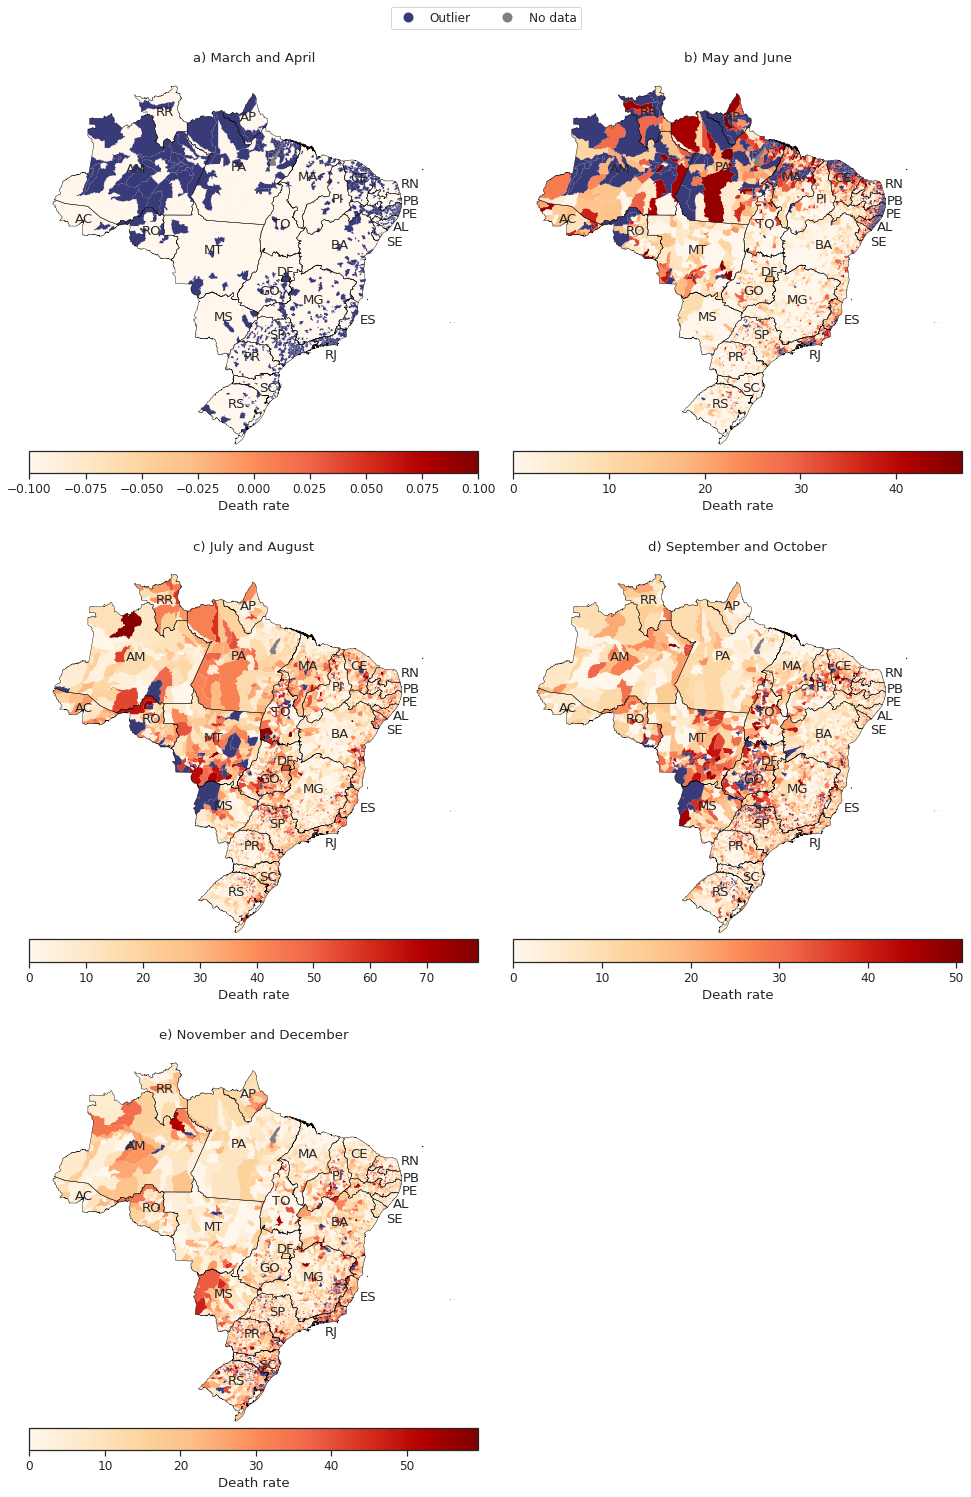

In [142]:
columns = ['Death rate (March-April, 2020)', 'Death rate (May-June, 2020)', 'Death rate (July-August, 2020)', 'Death rate (September-October, 2020)', 'Death rate (November-December, 2020)']
titles = ['a) March and April', 'b) May and June', 'c) July and August', 'd) September and October', 'e) November and December']
plot_map_mortality(df_map_municipalities, filename_extra='2020', columns=columns, titles=titles, height=52.2, nrows=3, ignore_outliers=[False, False, False, False, False, False])

<ipython-input-140-58ec36b1dcec>:58: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  outlier_plot.legend([], frameon=False)


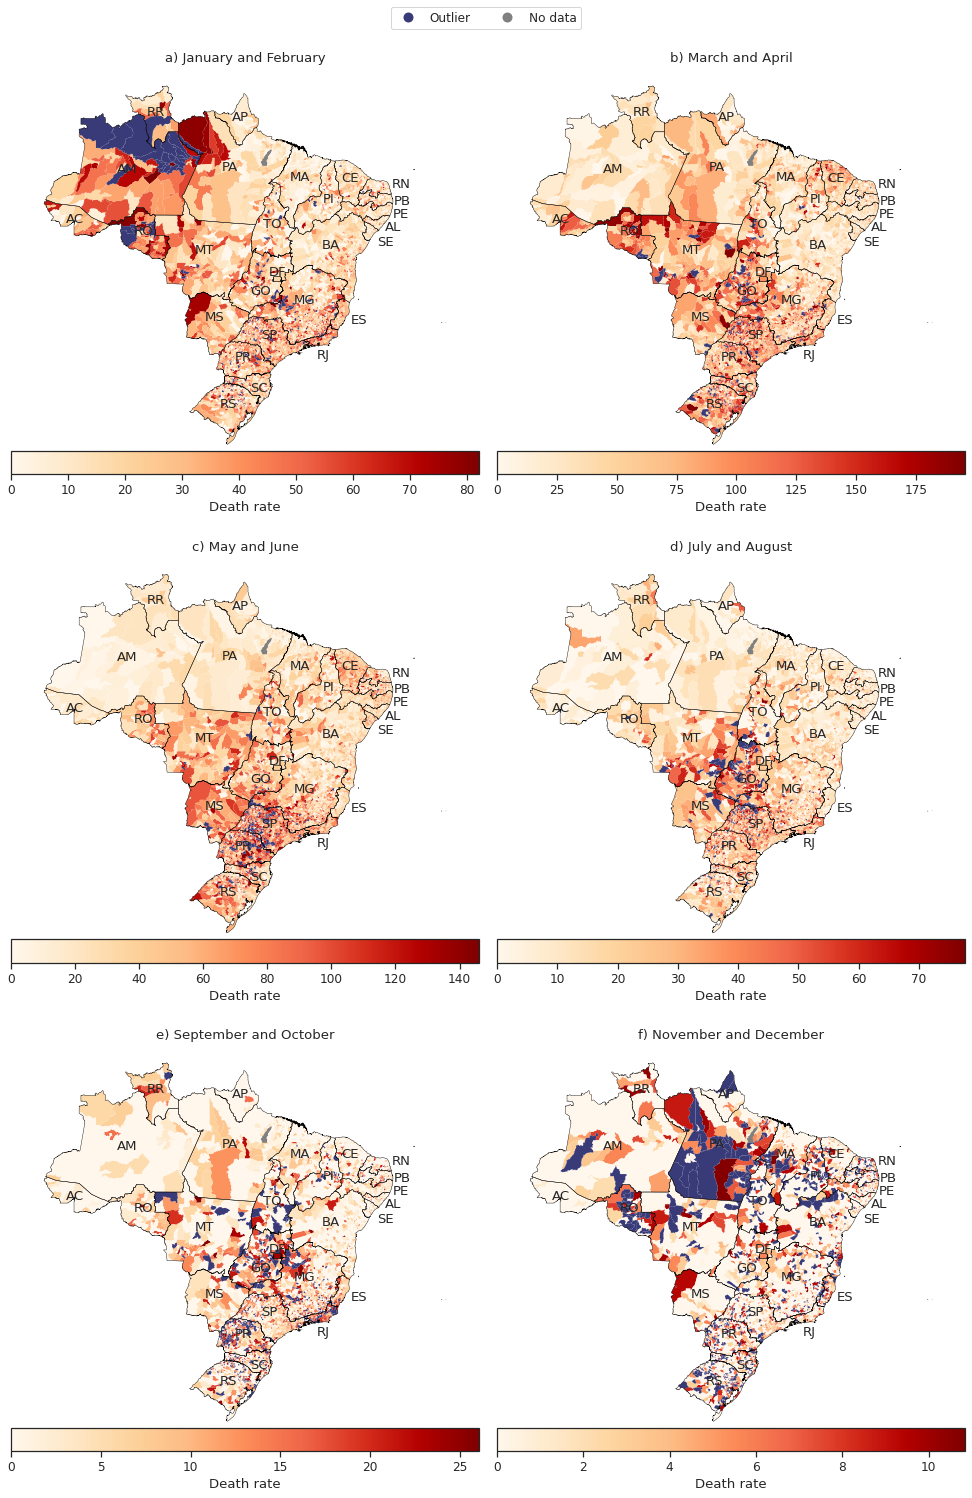

In [143]:
columns = ['Death rate (January-February, 2021)', 'Death rate (March-April, 2021)', 'Death rate (May-June, 2021)', 'Death rate (July-August, 2021)', 'Death rate (September-October, 2021)', 'Death rate (November-December, 2021)']
titles = ['a) January and February', 'b) March and April', 'c) May and June', 'd) July and August', 'e) September and October', 'f) November and December']
plot_map_mortality(df_map_municipalities, filename_extra='2021', columns=columns, titles=titles, height=52.2, nrows=3)

<ipython-input-140-58ec36b1dcec>:58: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  outlier_plot.legend([], frameon=False)


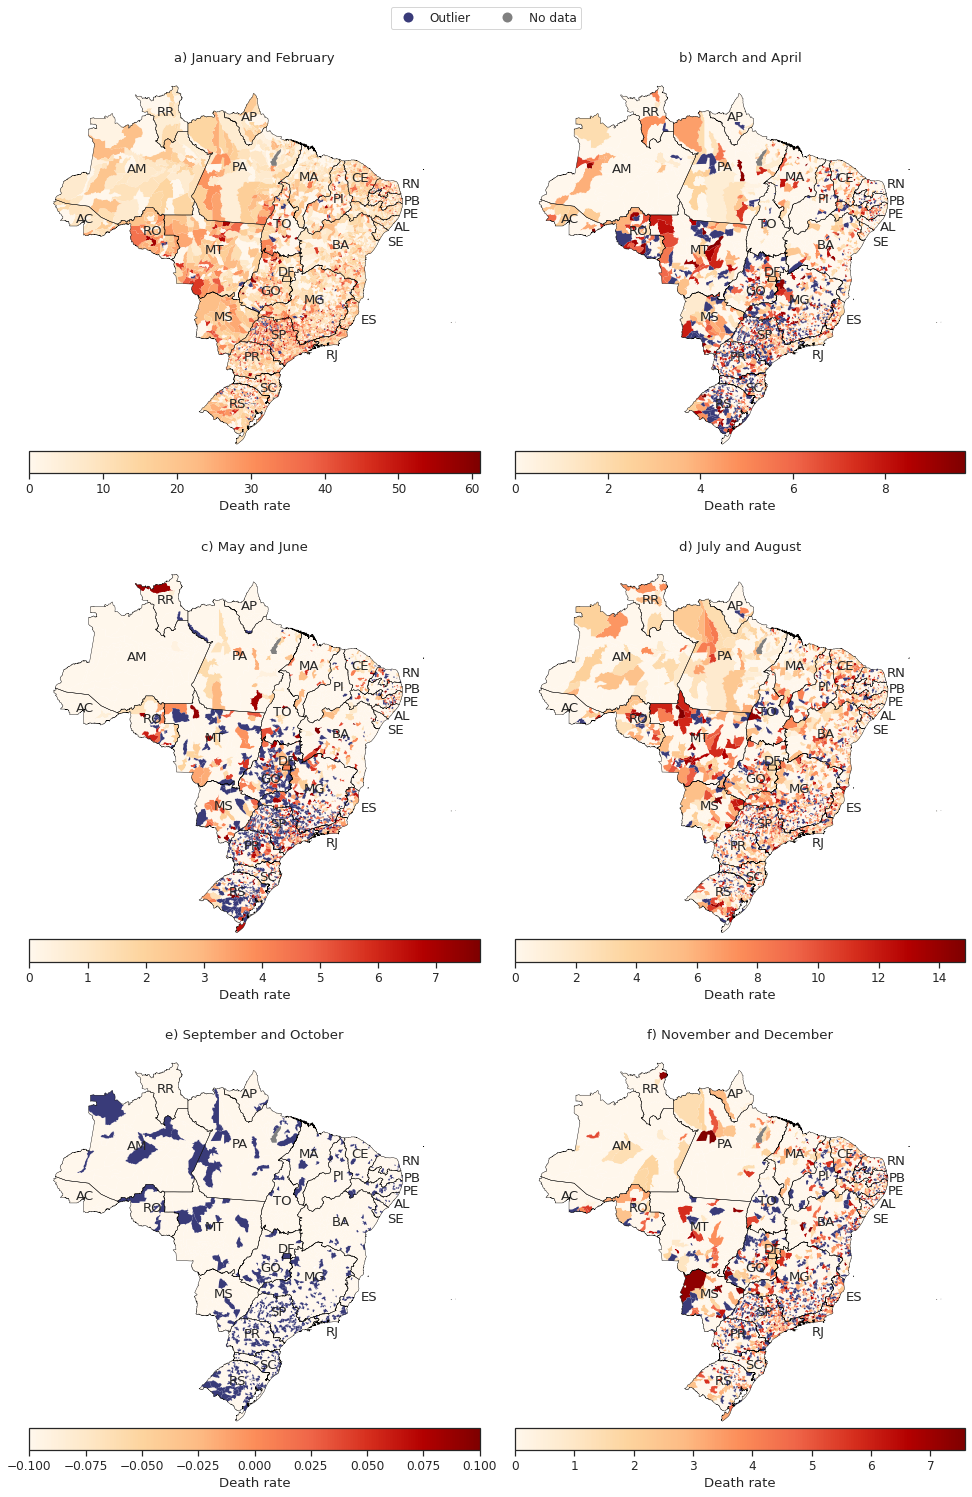

In [144]:
columns = ['Death rate (January-February, 2022)', 'Death rate (March-April, 2022)', 'Death rate (May-June, 2022)', 'Death rate (July-August, 2022)', 'Death rate (September-October, 2022)', 'Death rate (November-December, 2022)']
titles = ['a) January and February', 'b) March and April', 'c) May and June', 'd) July and August', 'e) September and October', 'f) November and December']
plot_map_mortality(df_map_municipalities, filename_extra='2022', columns=columns, titles=titles, height=52.2, nrows=3)

<ipython-input-140-58ec36b1dcec>:58: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  outlier_plot.legend([], frameon=False)


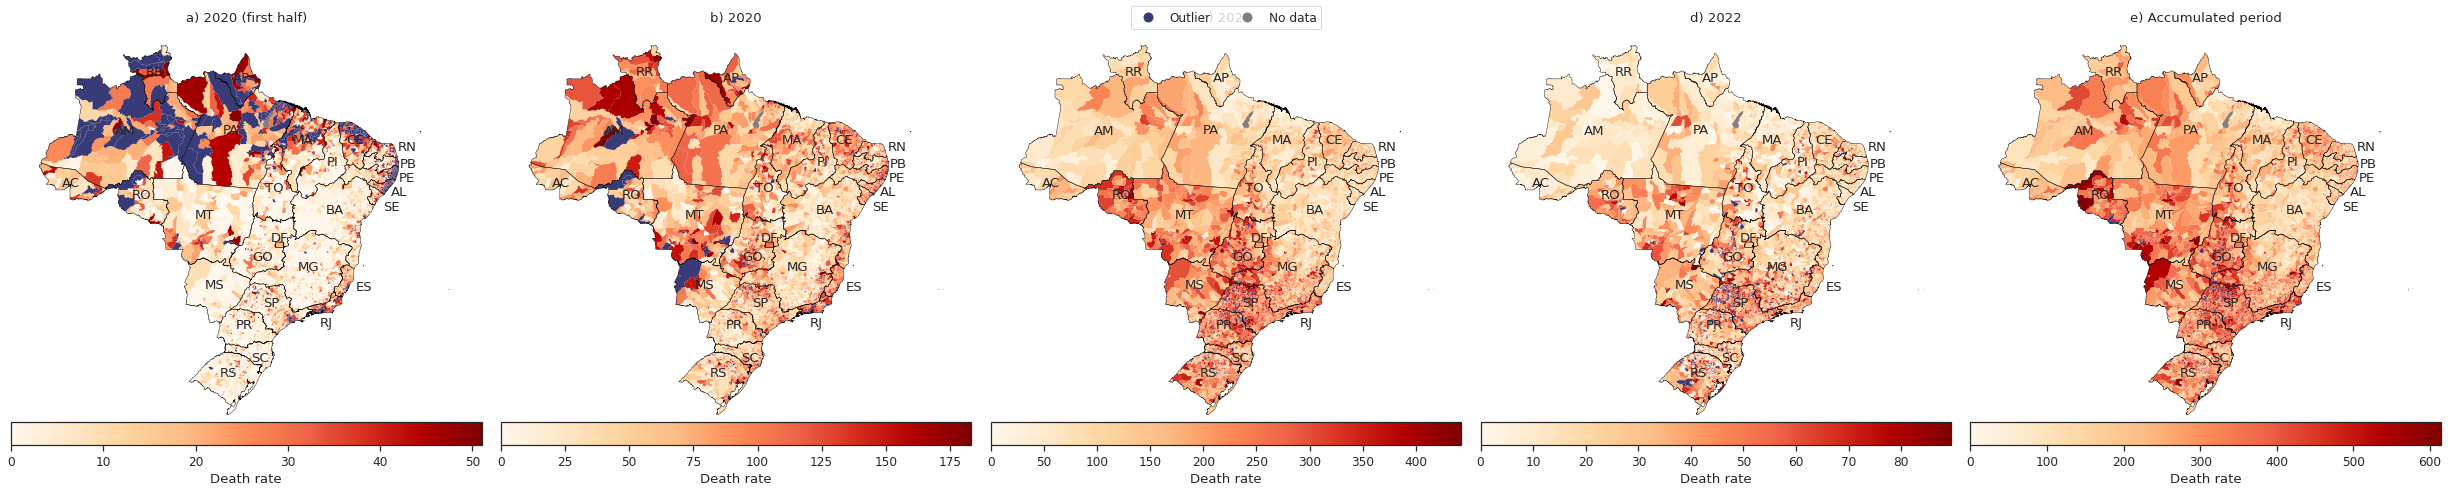

In [145]:
plot_map_mortality(df_map_municipalities, width=87, height=17.4, nrows=1, ncols=5, filename_extra='slide')